# Práctica de Análisis y Modelado de Crecimiento

## Objetivos de la Práctica

1. **Familiarizarse** con la lectura y exploración de datos de diferentes fenómenos.
2. **Aplicar técnicas de regresión** (lineal o transformaciones a modelos exponenciales/potenciales) para explicar o predecir el fenómeno de crecimiento.
3. **Interpretar** los resultados y reflexionar sobre la **validez** y **limitaciones** de los modelos, discutiendo la plausibilidad de extrapolaciones.
4. **Proponer** mejoras o variables adicionales que puedan influir en el fenómeno de forma no lineal o con saturaciones.

# Conjunto de datos 1: World Population Growth

**Archivo:** `World Population Growth.csv`

## Descripción de las columnas

- **Año (Year)**: Año del registro (1951-2023).
- **Población (Population)**: Entero que indica la población mundial en ese año.
- **Crecimiento Anual % (Yearly Growth %)**: Tasa porcentual de crecimiento anual (Float).
- **Número (Number)**: Aumento anual en términos absolutos (Entero): cuántas personas se añadieron a la población respecto al año anterior.
- **Densidad (Density (Pop/km²))**: Número de individuos por km² (Float).

# Ejercicio 1


## 1. Exploración Inicial

- **Cargar** el CSV en un DataFrame y ver `head()`, `tail()`, `info()`.
- Revisar la **forma** (tamaño) del dataset con `shape`, los tipos de datos (`dtypes`) y la presencia de valores nulos.
- **Cambiar el tipo de dato** de las variables si no son compatibles (por ejemplo, si aparecen como `object` en vez de `int` o `float`).
- Calcular estadísticas descriptivas: `mean()`, `std()`, `min()`, `max()`, etc. Usa el método `describe`.
- Representar gráficamente la **Población (Population) vs. Año (Year)** para observar la tendencia.
  - Pregunta: ¿Se ve como una gráfica exponencial o lineal? ¿La escala afecta la impresión de crecimiento?


### Cargar CSV y revisar tipos de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Cargar el CSV en un DataFrame
poblacion_mundial = pd.read_csv("World_Population_Growth.csv")

# 2) Revisar la forma, tipos y valores nulos
print("Forma del dataset:", poblacion_mundial.shape)


""" Termina el código """

Forma del dataset: (73, 5)


' Termina el código '

Observemos que, las columnas **Población (Population)**, **Crecimiento Anual % (Yearly Growth %)** o **Número (Number)** pueden aparecer como `object` (cadena). Para poder realizar operaciones matemáticas y de regresión, **debemos convertirlas** a tipos numéricos (`int` o `float`).

### Explicación del Cambio de Tipo de Datos
A continuación, se muestra cómo:
1. **Transformar** la columna a `string` (por si algunos registros ya están en otro tipo).
2. **Eliminar** símbolos (comas, `%`) que impiden la conversión numérica.
3. **Usar** `pd.to_numeric` para asignar un tipo `int` o `float`.
4. **Confirmar** que ahora sea numérico (por ejemplo, `float64`).


#### Población (Population)

In [8]:
# Cambiamos 'Population' a str en caso de que algunos registros sean numéricos y otros no.
poblacion_mundial['Population'] = poblacion_mundial['Population'].astype(str)

# Si hay comas, se sustituyen:
poblacion_mundial['Population'] = poblacion_mundial['Population'].str.replace(',', '', regex=True)

# Convertimos a numérico (float o int). 
poblacion_mundial['Population'] = pd.to_numeric(poblacion_mundial['Population'], errors='coerce')

# Revisar que ahora sea float64:
print("Population dtype:", poblacion_mundial['Population'].dtype)
print(poblacion_mundial[['Year','Population']].head())

Population dtype: int64
   Year  Population
0  1951  2543130380
1  1952  2590270899
2  1953  2640278797
3  1954  2691979339
4  1955  2746072141


#### Crecimiento Anual % (Yearly Growth %)

In [ ]:
# Forzar la columna a string

""" Termina el código """

# Reemplazar el símbolo '%'

""" Termina el código """

# Convertir a float


""" Termina el código """

#### Número (Number)

In [ ]:
# 1) Eliminar comas si las hay

""" Termina el código """

# 2) Convertir a numérico

""" Termina el código """

# Verificar tipo

""" Termina el código """

### Estadísticas Descriptivas y Gráfica Inicial


Estadísticas descriptivas:
               Year    Population  Density (Pop/km2)
count    73.000000  7.300000e+01          73.000000
mean   1987.000000  5.125104e+09          34.383562
std      21.217131  1.689156e+09          11.370808
min    1951.000000  2.543130e+09          17.000000
25%    1969.000000  3.620655e+09          24.000000
50%    1987.000000  5.040984e+09          34.000000
75%    2005.000000  6.558176e+09          44.000000
max    2023.000000  8.045311e+09          54.000000


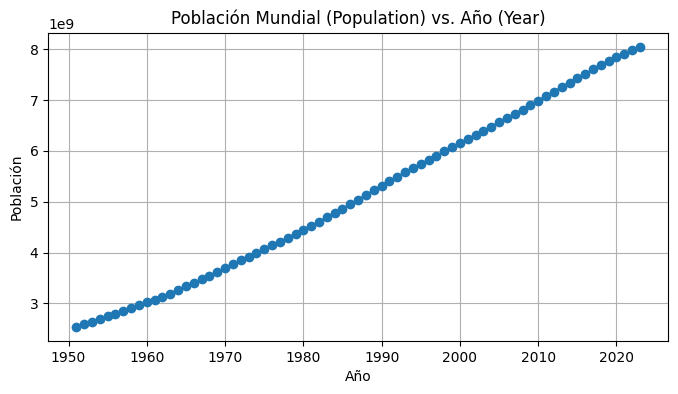

In [9]:
# 3) Estadísticas descriptivas
print("\nEstadísticas descriptivas:\n", poblacion_mundial.describe())

# 4) Gráfica de la Población vs. Año
plt.figure(figsize=(8,4))
plt.plot(poblacion_mundial['Year'], poblacion_mundial['Population'], marker='o', linestyle='-')
plt.title("Población Mundial (Population) vs. Año (Year)")
plt.xlabel("Año")
plt.ylabel("Población")
plt.grid(True)
plt.show()

## 2. Transformaciones a Modelos Exponenciales

- Muchas veces, el crecimiento poblacional se aproxima más a un modelo exponencial (o logístico) que a uno lineal.
- Intentar una **regresión logarítmica**:
  - Graficar las variables `ln(Population)` vs. `Year`.
  - Ajustar una recta.
  - Observar si se asemeja a una línea en la escala logarítmica.


In [10]:
# Crear nueva columna ln(Population)
poblacion_mundial['ln_poblacion'] = np.log(poblacion_mundial['Population'])

# Graficar ln(Population) vs. Year

""" Termina el código """

# Ajustar una recta con np.polyfit
x = poblacion_mundial['Year'].values
y = poblacion_mundial['ln_poblacion'].values
b, a = np.polyfit(x, y, 1)  # grado=1 => lineal

print("Ajuste ln(Population) = a + b*Year")
print(f"a (intercept) = {a:.3f}")
print(f"b (slope)     = {b:.3f}")

# Graficar la línea sobre los puntos

""" Termina el código """

Ajuste ln(Population) = a + b*Year
a (intercept) = -10.187
b (slope)     = 0.016


' Termina el código '

## 3. Variables Complementarias

- El dataset provee la **Crecimiento Anual % (Yearly Growth %)**.
  - Realizar **gráficos de dispersión** (pairplots) para ver posibles relaciones.
  - ¿Correlaciona con la **Densidad** o con **Número**?
  - Discutir: ¿Se justifica un **modelo puramente exponencial** a largo plazo sabiendo que los **recursos del planeta** son finitos?

In [ ]:
import seaborn as sns

# Pairplot para ver correlaciones
""" Debes hacer el código de la sección anterior para que esta gráfica este completa """
sns.pairplot(poblacion_mundial)
plt.show()

## 4. Cuestionamientos sobre predicciones

- ¿Qué pasa si extrapolas la curva exponencial **50 años al futuro**?
- ¿Es plausible pensar en un **crecimiento infinito** con recursos finitos?

## Preguntas de Reflexión (Extra)
- ¿Cómo interpretas el **Crecimiento Anual %** al ver que no es constante en el tiempo?
- ¿Hay factores históricos (guerras, epidemias, avances médicos) que podrían justificar rupturas en la tendencia?

## Conjunto de datos 2: Lettuce Dataset

**Archivo:** `lettuce_dataset.csv`

## Descripción de las columnas

- **Plant_ID**: Identificador de cada planta.
- **Date**: Fecha de la observación.
- **Temperatura (°C) [Temperature (°C)]**: Temperatura del ambiente (grados Celsius).
- **Humedad (%) [Humidity (%)]**: Nivel de humedad en porcentaje.
- **TDS (ppm) [TDS Value (ppm)]**: Sólidos disueltos totales, en partes por millón.
- **pH** [pH Level]: pH del agua o medio de cultivo.
- **Días de Crecimiento [Growth Days]**: Días transcurridos desde el inicio hasta la cosecha.

# Ejercicio 2

## 1. Exploración y Limpieza

- **Importar** el CSV y ver `head()`, `tail()`, `info()`.
- Identificar valores nulos; imputar si es necesario.
- Ajustar tipos de datos si hay columnas con comillas o caracteres extraños (ej. °C).

In [11]:
# Lectura con encoding='latin-1' para evitar error con símbolo °
data_lettuce = pd.read_csv("lettuce_dataset.csv", encoding="latin-1")

""" Termina el código """

# Vista inicial:
data_lettuce.head()

,Plant_ID,Date,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,8/3/2023,33.4,53,582,6.4,1
1,1,8/4/2023,33.5,53,451,6.1,2
2,1,8/5/2023,33.4,59,678,6.4,3
3,1,8/6/2023,33.4,68,420,6.4,4
4,1,8/7/2023,33.4,74,637,6.5,5


## 2. Promedio de Variables y Modelo de Crecimiento

- Para cada **Plant_ID**, calcular los promedios de **Temperatura**, **Humedad**, etc. durante el período.
- Asociar esos promedios al **Días de Crecimiento** (Growth Days).

In [12]:
# Agrupar por Plant_ID y calcular promedio
grouped_lettuce = data_lettuce.groupby('Plant_ID').agg({
    'Temperature (°C)': 'mean',
    'Humidity (%)': 'mean',
    'TDS Value (ppm)': 'mean',
    'pH Level': 'mean',
})

# Días finales (max) para cada planta
growth_days_end = data_lettuce.groupby('Plant_ID')['Growth Days'].max()

df_averages = grouped_lettuce.copy()
df_averages['GrowthDays_Final'] = growth_days_end

df_averages

,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,GrowthDays_Final
Plant_ID,,,,,
1,30.628889,63.955556,615.311111,6.382222,45
2,30.628889,64.600000,596.888889,6.446667,45
3,30.606383,68.680851,620.404255,6.408511,47
4,30.645833,63.354167,598.208333,6.433333,48
5,30.628889,65.066667,577.133333,6.404444,45
...,...,...,...,...,...
66,21.333333,64.911111,584.977778,6.348889,45
67,21.311111,63.688889,618.955556,6.413333,45
68,21.600000,65.133333,602.311111,6.411111,45


## 3. Filtrado

- Filtrar datos donde **Temperatura (°C) > 25** y **Humedad (%) > 50**.
- Comparar la media de Días de Crecimiento en esas condiciones.

In [ ]:
# Filtro

""" Termina el código """

# Comparar Growth Days

""" Termina el código """
